In [3]:
from evo.core import metrics

In [4]:
from evo.tools import log
log.configure_logging(verbose=True, debug=True, silent=False)

import pprint
import numpy as np

from evo.tools import plot
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

# temporarily override some package settings
from evo.tools.settings import SETTINGS
SETTINGS.plot_usetex = False

[DEBUG][2022-10-19 16:07:11,939][log.configure_logging():112]
System info:
Python 3.8.10
Linux-5.15.0-50-generic-x86_64-with-glibc2.29
xianjia@xianjia-workpc



In [5]:
from evo.tools import file_interface

ref_file = "/home/xianjia/Workspace/temp/evo/test/data/freiburg1_xyz-groundtruth.txt"
est_file = "/home/xianjia/Workspace/temp/evo/test/data/freiburg1_xyz-rgbdslam_drift.txt"

traj_ref = file_interface.read_tum_trajectory_file(ref_file)
traj_est = file_interface.read_tum_trajectory_file(est_file)

[DEBUG][2022-10-19 16:07:13,296][file_interface.read_tum_trajectory_file():117]
Loaded 3000 stamps and poses from: /home/xianjia/Workspace/temp/evo/test/data/freiburg1_xyz-groundtruth.txt
[DEBUG][2022-10-19 16:07:13,300][file_interface.read_tum_trajectory_file():117]
Loaded 788 stamps and poses from: /home/xianjia/Workspace/temp/evo/test/data/freiburg1_xyz-rgbdslam_drift.txt


In [6]:
from evo.core import sync

max_diff = 0.01

traj_ref, traj_est = sync.associate_trajectories(traj_ref, traj_est, max_diff)

[DEBUG][2022-10-19 16:07:14,151][sync.associate_trajectories():110]
Found 785 of max. 788 possible matching timestamps between...
	first trajectory
and:	second trajectory
..with max. time diff.: 0.01 (s) and time offset: 0.0 (s).


In [7]:
import copy

traj_est_aligned = copy.deepcopy(traj_est)
traj_est_aligned.align(traj_ref, correct_scale=False, correct_only_scale=False)

[DEBUG][2022-10-19 16:07:14,878][trajectory.align():200]
Aligning using Umeyama's method...
[DEBUG][2022-10-19 16:07:14,883][trajectory.align():212]
Rotation of alignment:
[[ 0.7910943  -0.49980855 -0.35264888]
 [ 0.4946599   0.8618597  -0.11184559]
 [ 0.35983524 -0.08596085  0.92904754]]
Translation of alignment:
[ 1.1905635  -0.38662212 -0.30561955]
[DEBUG][2022-10-19 16:07:14,884][trajectory.align():214]
Scale correction: 1.0


(array([[ 0.7910943 , -0.49980855, -0.35264888],
        [ 0.4946599 ,  0.8618597 , -0.11184559],
        [ 0.35983524, -0.08596085,  0.92904754]]),
 array([ 1.1905635 , -0.38662212, -0.30561955]),
 1.0)

<IPython.core.display.Javascript object>


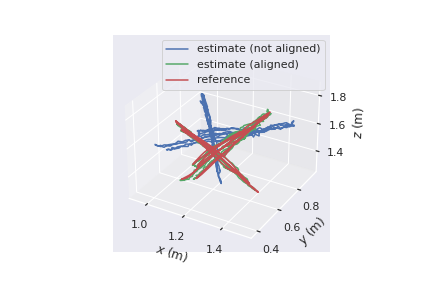

In [8]:
fig = plt.figure()
traj_by_label = {
    "estimate (not aligned)": traj_est,
    "estimate (aligned)": traj_est_aligned,
    "reference": traj_ref
}
plot.trajectories(fig, traj_by_label, plot.PlotMode.xyz)
plt.show()